In [ ]:
import pandas as pd

In [ ]:
# prompt: read csv code. file path /content/Bank_Campaign_Data.csv

df = pd.read_csv('/content/Bank_Campaign_Data.csv')
print(df.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
# prompt: Encode categorical columns ('job', 'marital', 'education', 'contact', 'poutcome', 'month', 'y') and boolean values ('yes', 'no') for logistic regression

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Define categorical and boolean columns
categorical_cols = ['job', 'marital', 'education', 'contact', 'poutcome', 'month', 'y']
boolean_cols = ['default', 'housing', 'loan']

# Encode categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Encode boolean columns
for col in boolean_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


In [ ]:
print(df.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  


In [ ]:
# prompt: check for null values

print(df.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# prompt: check duplicates across all columns

# Check for duplicates across all columns
duplicates = df[df.duplicated(keep=False)]

if not duplicates.empty:
    print("Duplicate rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")


No duplicate rows found.


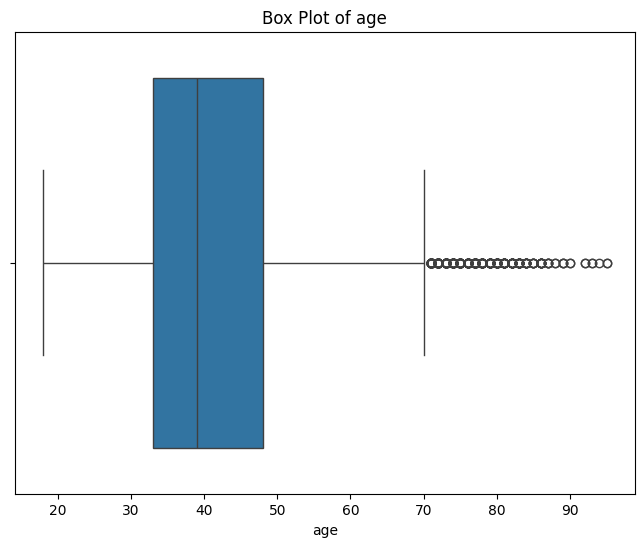

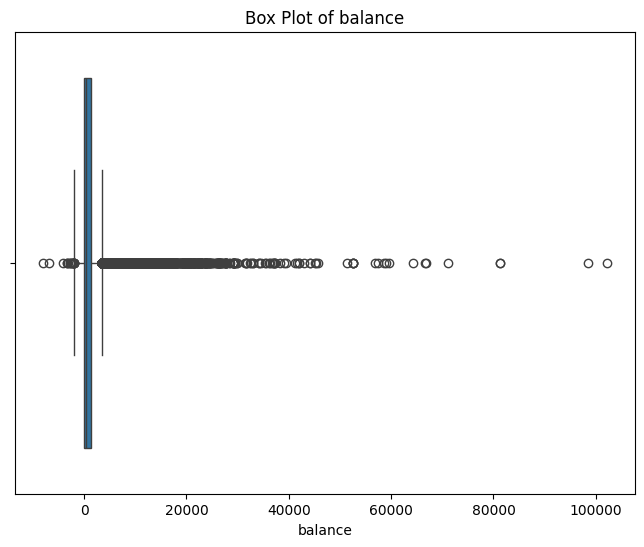

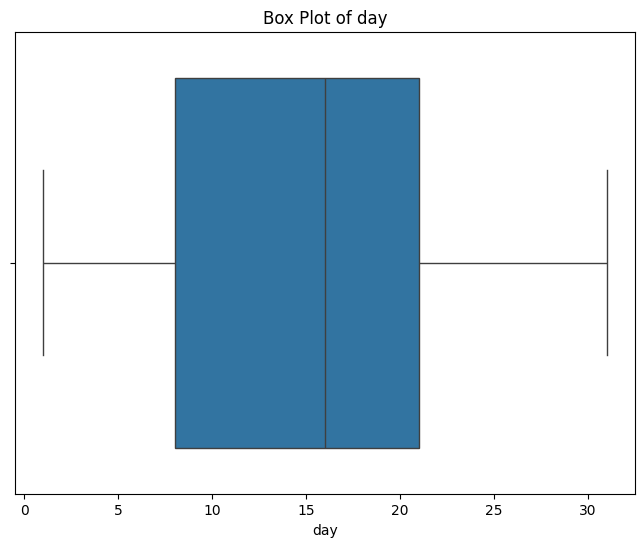

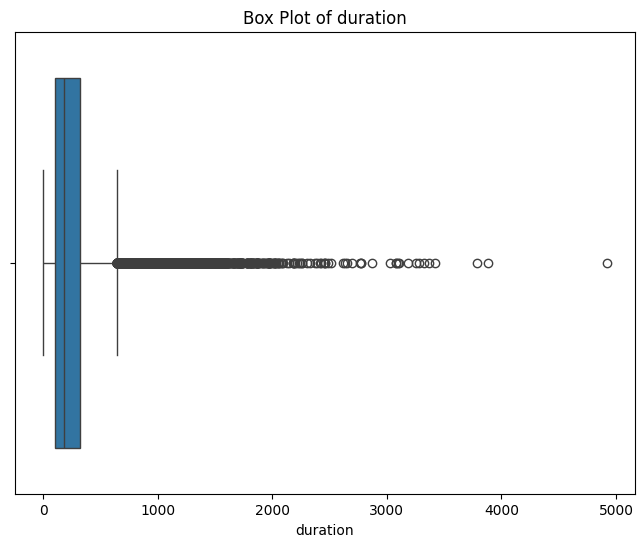

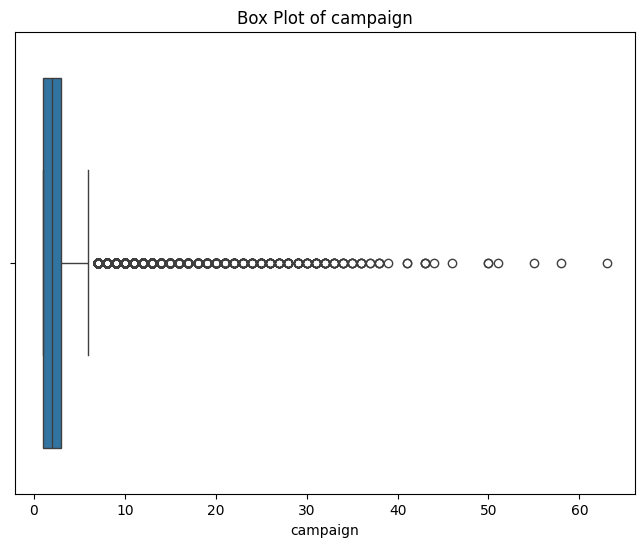

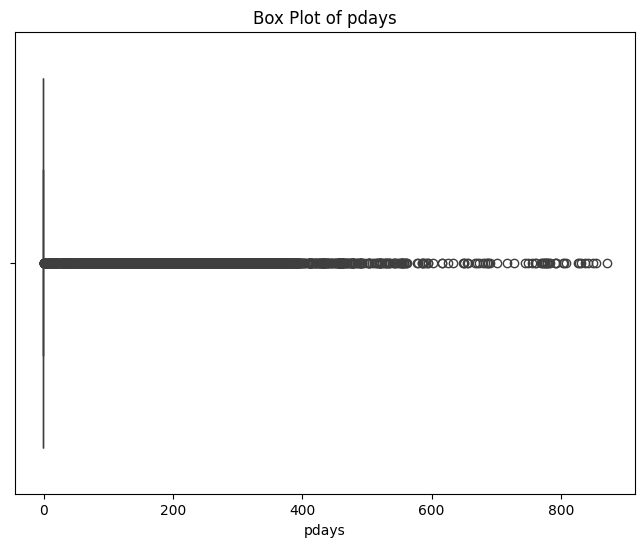

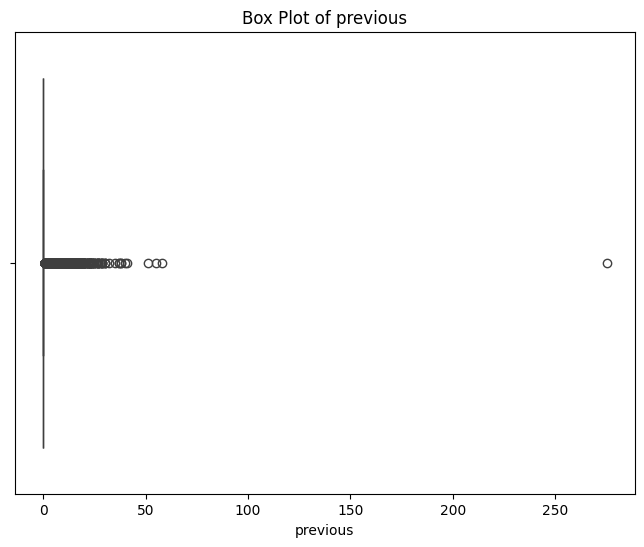

In [ ]:
# prompt: check outliers using Box plot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with encoded data

# List numerical features for outlier analysis
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']  # Add other numerical columns

# Loop to create box plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()


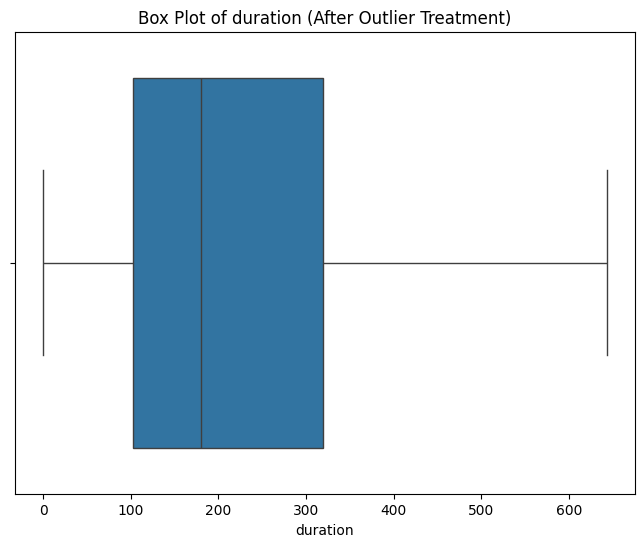

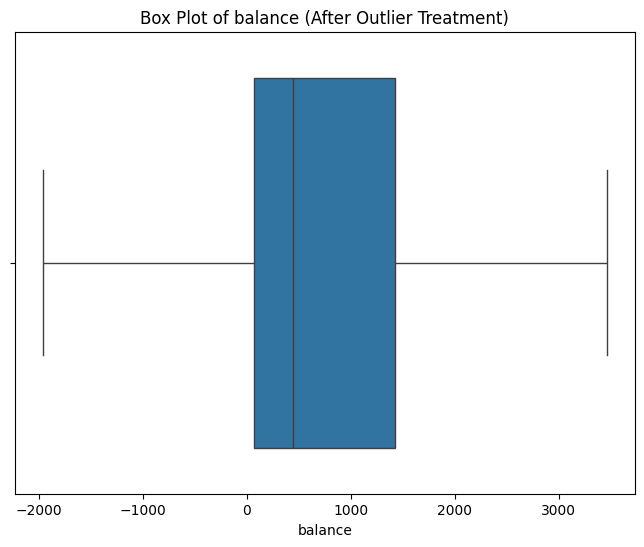

In [ ]:
# prompt: treat outliers in  duration and balance, and give boxplot

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code)

def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Treat outliers in 'duration' and 'balance' using IQR
df = treat_outliers_iqr(df, 'duration')
df = treat_outliers_iqr(df, 'balance')

# Create box plots after outlier treatment
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['duration'])
plt.title('Box Plot of duration (After Outlier Treatment)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['balance'])
plt.title('Box Plot of balance (After Outlier Treatment)')
plt.show()


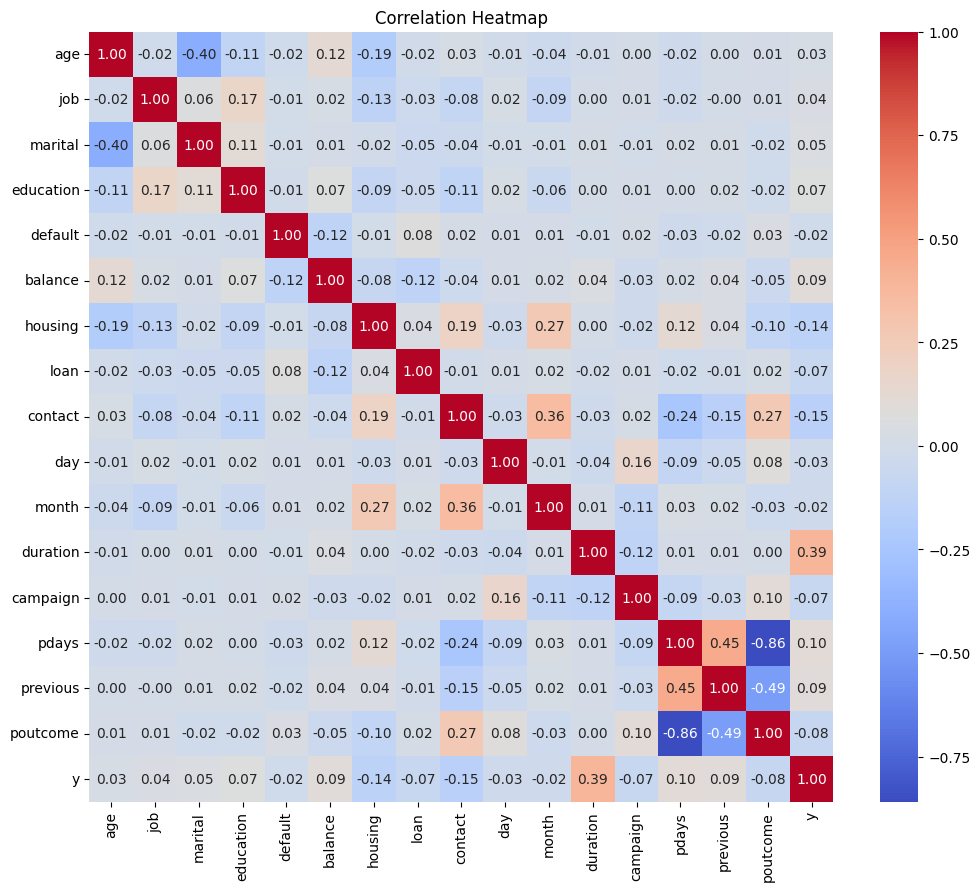

In [ ]:
# prompt: Generate correlation heat map

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# prompt: Perform Logistic regression using stats model

import statsmodels.api as sm

# Define features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Add a constant to the features (intercept term)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the model summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.259565
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45194
Method:                           MLE   Df Model:                           16
Date:                Fri, 04 Apr 2025   Pseudo R-squ.:                  0.2807
Time:                        12:51:52   Log-Likelihood:                -11735.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8460      0.151    -32.026      0.000      -5.143      -4.549
age            0.0067      0.

In [ ]:
# prompt: Do step by step regression and drop insignificant columns one by one

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ... (Your existing code for data loading, preprocessing, and outlier treatment)

# Define features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Add a constant to the features (intercept term)
X = sm.add_constant(X)

# Function to perform stepwise regression and drop insignificant features
def stepwise_regression(X, y):
    # Initialize variables
    included_features = list(X.columns)
    significant_features = []

    while True:
        # Fit the model with current set of features
        model = sm.Logit(y, X[included_features])
        result = model.fit()

        # Print model summary for each iteration
        print(result.summary())

        # Find the least significant feature
        p_values = result.pvalues.drop('const')  # Exclude the intercept
        least_significant_feature = p_values.idxmax()
        p_value = p_values.max()

        # Check for significance
        if p_value > 0.05: # Adjust p-value significance level if needed
            if least_significant_feature in included_features:
                included_features.remove(least_significant_feature)
                print(f"Removing feature: {least_significant_feature}")
        else:
            significant_features = included_features
            break # Stop when all features are significant
    return significant_features


# Perform stepwise regression
significant_cols = stepwise_regression(X,y)
print("Significant Features:", significant_cols)

# Fit the final model with significant features
X_final = X[significant_cols]
model_final = sm.Logit(y, X_final)
result_final = model_final.fit()
print(result_final.summary())


Optimization terminated successfully.
         Current function value: 0.259565
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45194
Method:                           MLE   Df Model:                           16
Date:                Fri, 04 Apr 2025   Pseudo R-squ.:                  0.2807
Time:                        12:52:26   Log-Likelihood:                -11735.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8460      0.151    -32.026      0.000      -5.143      -4.549
age            0.0067      0.

# Log-Likelihood measures how well the model fits the data.

# A higher (less negative) value means a better fit.

# The current value of -11,737 suggests the model has found a reasonable balance but still has room for improvement.

Confusion Matrix:
[[38854  1068]
 [ 3997  1292]]


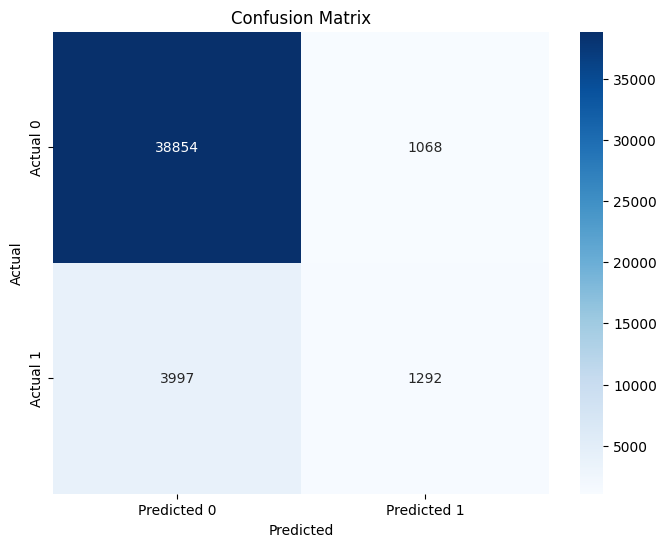

In [ ]:
# prompt: generate confusion matrix using stats model

from sklearn.metrics import confusion_matrix
import numpy as np

# Predict the target variable using the final model
y_pred = result_final.predict(X_final)
y_pred_class = np.where(y_pred > 0.5, 1, 0)  # Classify based on probability threshold

# Create the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_class)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix (requires matplotlib and seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# The model correctly predicted 38,854 people as non-subscribers (true negatives).

# It incorrectly predicted 1,068 people as subscribers when they actually didn’t subscribe (false positives).

# It missed 3,997 actual subscribers by predicting they wouldn’t subscribe (false negatives).

# It correctly identified 1,292 actual subscribers (true positives).



In [ ]:
# prompt: Generate classification table

# Assuming 'y' is your true labels and 'y_pred_class' is your predicted classes
from sklearn.metrics import classification_report

print(classification_report(y, y_pred_class))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     39922
           1       0.55      0.24      0.34      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.61      0.64     45211
weighted avg       0.86      0.89      0.87     45211



In [ ]:
# prompt: Generate AUC

from sklearn.metrics import roc_auc_score

# Calculate the AUC
auc = roc_auc_score(y, y_pred)  # Use y_pred (probabilities) for AUC

print(f"AUC: {auc}")


AUC: 0.8733550654443588


# The AUC (Area Under the Curve) = 0.87, which means:

# The model does a good job distinguishing between subscribers and non-subscribers.

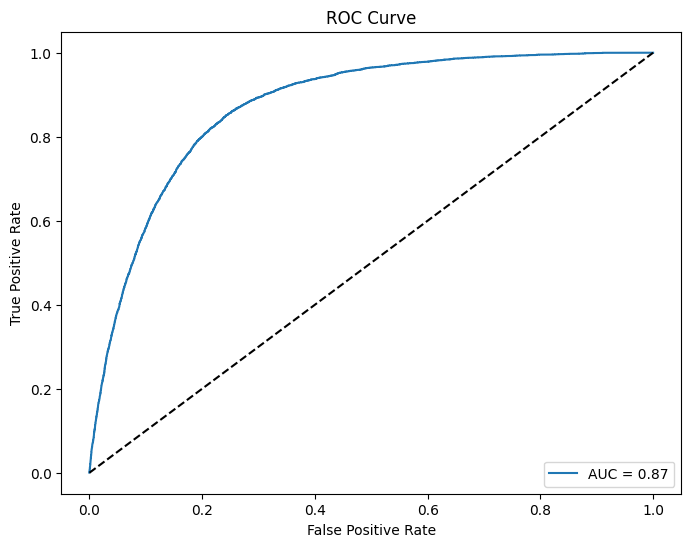

In [ ]:
# prompt: Generate AUC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming 'y' is your true labels and 'y_pred' is your predicted probabilities
fpr, tpr, thresholds = roc_curve(y, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


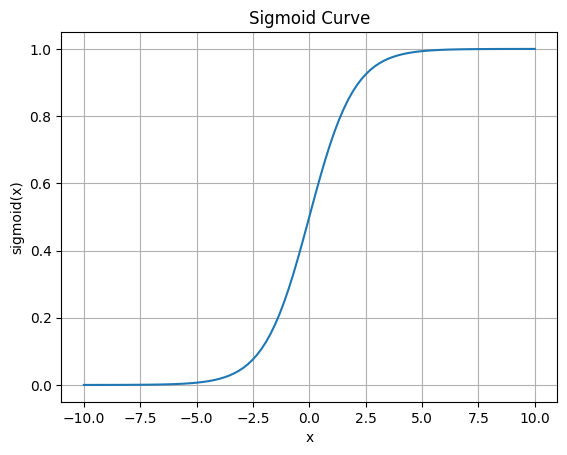

In [ ]:
# prompt: Generate SIgmoid curve

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 100)

# Calculate corresponding y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid curve
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid Curve")
plt.grid(True)
plt.show()


In [ ]:
# prompt: check for multicolinearity using VIF

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'X_final' is your DataFrame with significant features from stepwise regression
# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
vif["features"] = X_final.columns
vif


,VIF Factor,features
0,86.484372,const
1,1.286822,age
2,1.217959,marital
3,1.044610,education
4,1.021308,default
5,1.063551,balance
6,1.182381,housing
7,1.026236,loan
8,1.319180,contact
9,1.039791,day


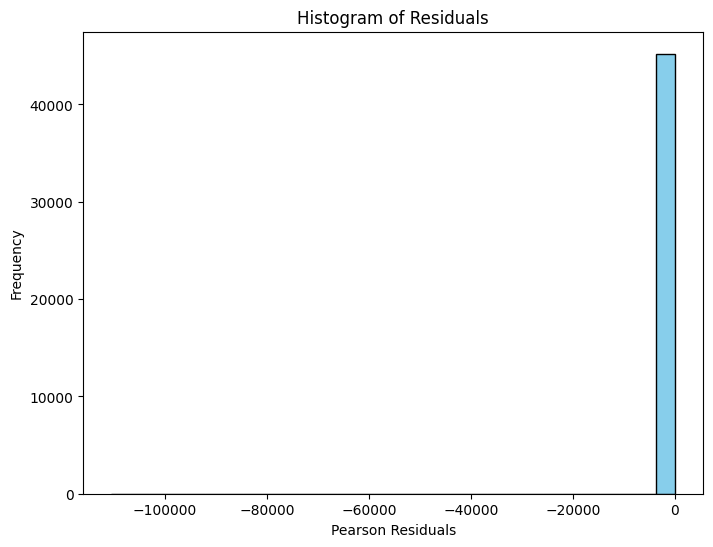

In [ ]:
# prompt: check for residual and give histogram

import matplotlib.pyplot as plt
# Assuming 'result_final' is your fitted logistic regression model from statsmodels

# Obtain the residuals
residuals = result_final.resid_pearson

# Create a histogram of the residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Pearson Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
